# Imports and load model and data

In [ ]:
import sys
from pathlib import Path


In [ ]:
# 项目根目录
proj_root = Path("/home/yangk/intership_2025_COSYS")

# src路径
src_dir = proj_root / "src"
# 加入 sys.path
if str(src_dir) not in sys.path:
    sys.path.append(str(src_dir))

from pl_model import LitModel 
from dataset import BIPEDv2

In [ ]:
# Load model
model = LitModel.load_from_checkpoint(str(src_dir / "checkpoints" / "point05" / "model.ckpt"))

# Load data
data_dir = proj_root / "resource/DexiNed/BIPEDv2/BIPED/edges"
test_dataset = BIPEDv2(
    data_dir / "imgs" / "test" / "rgbr",
    data_dir / "edge_maps" / "test" / "rgbr"
)


# Loss

In [14]:
# Load log
import pandas as pd

df = pd.read_csv(src_dir / "lightning_logs/version_0/metrics.csv")

In [21]:
train_loss_epoch = list(df['train_loss_epoch'][~df['train_loss_epoch'].isna()])
val_loss_epoch = list(df['val_loss'][~df['val_loss'].isna()])

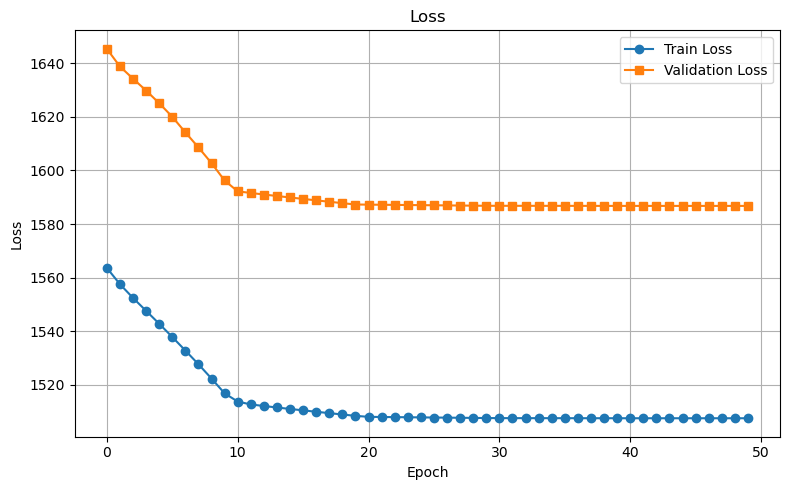

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_loss_epoch, label='Train Loss', marker='o')
plt.plot(val_loss_epoch, label='Validation Loss', marker='s')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Inference

In [12]:
test_item = test_dataset[0]

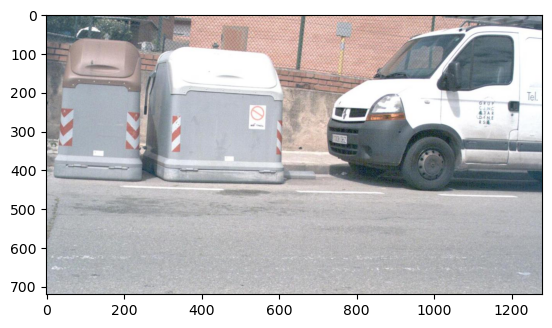

In [13]:
import matplotlib.pyplot as plt
from PIL import Image


plt.imshow(Image.open(test_item['image_path']))
plt.show()

In [ ]:
import torch

with torch.no_grad():
    outputs = model(test_item['image_tensor'].unsqueeze(0))
    pred = outputs[-1].squeeze()
    

In [33]:
output = model.model(test_item['image_tensor'].unsqueeze(0))[-1].squeeze()

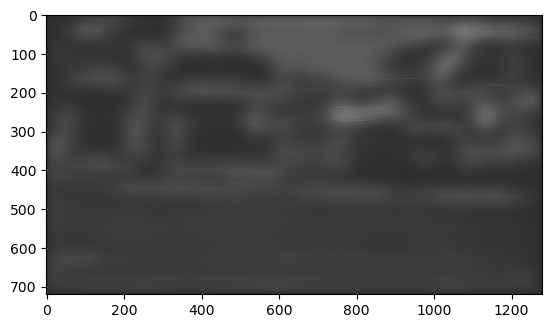

In [37]:
plt.imshow(output.detach().numpy(), cmap="gray")
plt.show()

In [ ]:
from skimage.morphology import thin

thin()